In [1]:
# Load the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

# Import data
codon_usage = pd.read_csv("codon_usage.csv")
print(codon_usage.head())

# Make the data object adenodat which will be used for data wrangling
adenodat = codon_usage

  Kingdom  DNAtype  SpeciesID  Ncodons  \
0     vrl        0     100217     1995   
1     vrl        0     100220     1474   
2     vrl        0     100755     4862   
3     vrl        0     100880     1915   
4     vrl        0     100887    22831   

                               SpeciesName      UUU      UUC      UUA  \
0  Epizootic haematopoietic necrosis virus  0.01654  0.01203  0.00050   
1                         Bohle iridovirus  0.02714  0.01357  0.00068   
2             Sweet potato leaf curl virus  0.01974   0.0218  0.01357   
3             Northern cereal mosaic virus  0.01775  0.02245  0.01619   
4           Soil-borne cereal mosaic virus  0.02816  0.01371  0.00767   

       UUG      CUU  ...      CGG      AGA      AGG      GAU      GAC  \
0  0.00351  0.01203  ...  0.00451  0.01303  0.03559  0.01003  0.04612   
1  0.00678  0.00407  ...  0.00136  0.01696  0.03596  0.01221  0.04545   
2  0.01543  0.00782  ...  0.00596  0.01974  0.02489  0.03126  0.02036   
3  0.00992  0.01

In [2]:
# Create advir DataFrame containing only virus columns
advir = adenodat[adenodat['Kingdom'].str.contains('vrl')]

# Use a list containing "Human" and "adenovirus" strings to extract Human adenovirus data
match_pattern = ['Human', 'adenovirus']
# Use another boolean indexing to select rows containing "adenovirus"
advir = advir[advir['SpeciesName'].str.contains('Human adenovirus')]

# Make Rownames => Species
advir = advir.set_index('SpeciesName')
print(advir.head())

                         Kingdom  DNAtype  SpeciesID  Ncodons      UUU  \
SpeciesName                                                              
Human adenovirus type 7d     vrl        0     101029     5274  0.02579   
Human adenovirus 2           vrl        0      10515    34165  0.02359   
Human adenovirus type 7      vrl        0      10519    68179  0.02009   
Human adenovirus type 14     vrl        0      10521    14698  0.02347   
Human adenovirus type 35     vrl        0      10522    25446  0.02154   

                              UUC      UUA      UUG      CUU      CUC  ...  \
SpeciesName                                                            ...   
Human adenovirus type 7d  0.02218  0.01479  0.01024  0.02294  0.00758  ...   
Human adenovirus 2        0.01543  0.00278  0.01528  0.02385  0.01004  ...   
Human adenovirus type 7   0.01948  0.00757  0.01305  0.01737  0.01443  ...   
Human adenovirus type 14  0.01578  0.01000  0.01830  0.01953  0.01129  ...   
Human adenovi

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

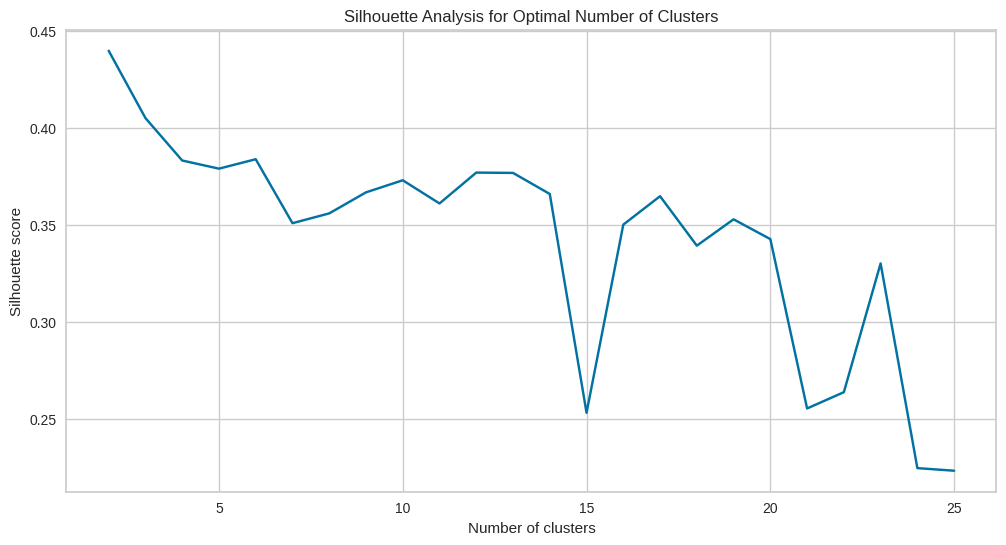

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import elbow

# Extract the relevant columns from the advir DataFrame
X = advir.iloc[:, 5:68].values

# Compute the silhouette score for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 26):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette score
plt.figure(figsize=(12, 6))
plt.plot(range(2, 26), silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Silhouette Analysis for Optimal Number of Clusters")
plt.show()

<ipython-input-4-a730f870a3b3>:12: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dmatrix, method='complete')


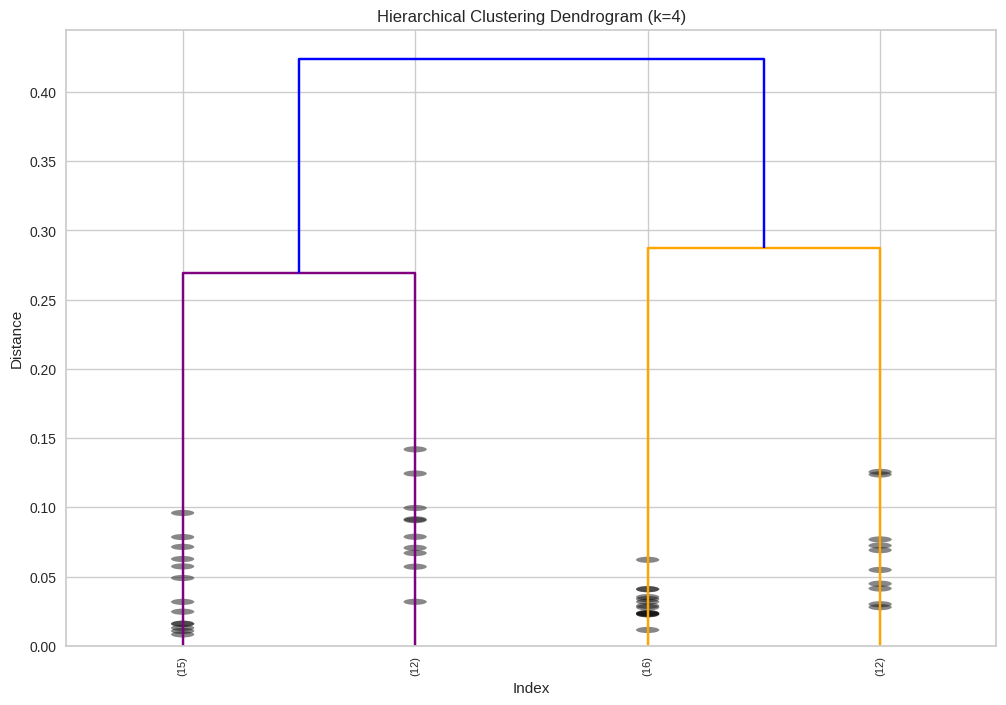

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Create the distance matrix
X = advir.iloc[:, 5:68].values
X = np.array(X, dtype=float)
dmatrix = squareform(pdist(X, metric='euclidean'))

# Perform agglomerative clustering using complete linkage
Z = linkage(dmatrix, method='complete')

# Create the dendrogram for k=4 clusters
fig, ax = plt.subplots(figsize=(12, 8))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
    color_threshold=np.inf,
    above_threshold_color='grey',
     link_color_func=lambda x: ['blue', 'green', 'red', 'yellow', 'purple', 'orange'][x % 6]
)
   # link_color_func=lambda x: ['blue', 'green3', 'red', 'aquamarine'][x]
#)
plt.title('Hierarchical Clustering Dendrogram (k=4)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

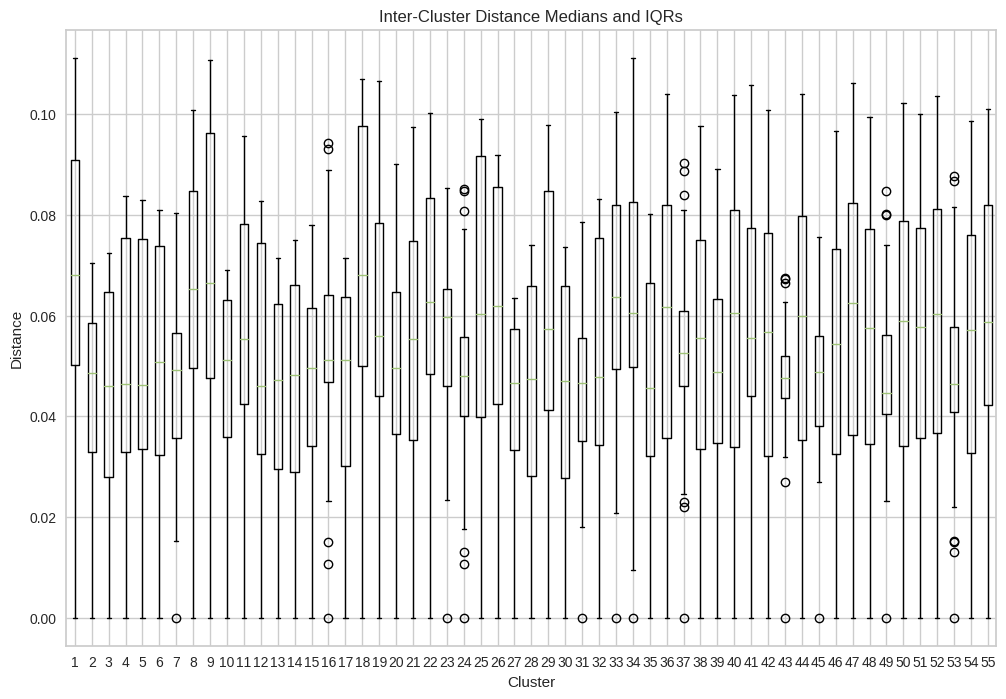

In [5]:
# Cut the dendrogram into 4 parts
from scipy.cluster.hierarchy import cut_tree
cutdend = cut_tree(Z, n_clusters=4)

# Prepare the data for visualization
import numpy as np
data = np.array(advir.iloc[:, 6:69], dtype=float)
data = np.log(data + 1)
rownames = advir.index


# Evaluate inter/intra-cluster distances and cluster attributes
from scipy.spatial.distance import pdist, squareform
distances = pdist(data, 'euclidean')
dfinter = squareform(distances)
intradim = [distances[np.where(cutdend == i)[0]] for i in np.unique(cutdend)]
att = pd.DataFrame({'cluster_size': [np.sum(cutdend == i) for i in np.unique(cutdend)]})

# Plot the inter-cluster distance medians and IQRs
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.boxplot(dfinter)
plt.title('Inter-Cluster Distance Medians and IQRs')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.show()

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the PAH model
class PAHModel:
    def __init__(self, n_levels, n_features, sigma):
        self.n_levels = n_levels
        self.n_features = n_features
        self.sigma = sigma

        # Initialize the model parameters
        self.W = [np.random.randn(n_features, n_features) for _ in range(n_levels)]
        self.b = [np.random.randn(n_features) for _ in range(n_levels)]
        self.z = [np.random.randn(n_features) for _ in range(n_levels)]

    def forward(self, x):
        h = x
        for l in range(self.n_levels):
            h = np.dot(h, self.W[l]) + self.b[l]
            h = self.z[l] + h
        return h

    def log_likelihood(self, X, y):
        log_likelihood = 0
        for i in range(len(X)):
            y_hat = self.forward(X[i])
            log_likelihood += np.sum(-0.5 * (y[i] - y_hat)**2 / self.sigma**2)
        return log_likelihood

    def train(self, X, y, lr=0.01, n_epochs=100):
        for epoch in range(n_epochs):
            grad_W = [np.zeros_like(w) for w in self.W]
            grad_b = [np.zeros_like(b) for b in self.b]
            grad_z = [np.zeros_like(z) for z in self.z]

            for i in range(len(X)):
                y_hat = self.forward(X[i])
                grad_y = (y[i] - y_hat) / self.sigma**2

                for l in reversed(range(self.n_levels)):
                    grad_W[l] += np.outer(X[i], grad_y)
                    grad_b[l] += grad_y
                    grad_y = np.dot(grad_y, self.W[l].T)
                    grad_z[l] += grad_y

            self.W = [w - lr * gw for w, gw in zip(self.W, grad_W)]
            self.b = [b - lr * gb for b, gb in zip(self.b, grad_b)]
            self.z = [z - lr * gz for z, gz in zip(self.z, grad_z)]

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Log-likelihood = {self.log_likelihood(X, y):.2f}")

# Example usage
n_levels = 3
n_features = 10
sigma = 1.0


model = PAHModel(n_levels, n_features, sigma)

# Generate some sample data
X = np.random.randn(100, n_features)
y = model.forward(X) + np.random.randn(100, n_features) * sigma
# Generate random noise with the same shape as the model output
#y = model.forward(X) + np.random.randn(100) * sigma

# Train the model
model.train(X, y)

Epoch 0: Log-likelihood = -3221373.32
Epoch 10: Log-likelihood = nan
Epoch 20: Log-likelihood = nan
Epoch 30: Log-likelihood = nan
Epoch 40: Log-likelihood = nan


<ipython-input-12-75527fb849a9>:42: RuntimeWarning: invalid value encountered in add
  grad_W[l] += np.outer(X[i], grad_y)


Epoch 50: Log-likelihood = nan
Epoch 60: Log-likelihood = nan
Epoch 70: Log-likelihood = nan
Epoch 80: Log-likelihood = nan
Epoch 90: Log-likelihood = nan


In [13]:
import pandas as pd

data = pd.read_csv('codon_usage.csv')
X = data.iloc[:, :-1].values  # Input features (codon frequencies)
y = data.iloc[:, -1].values  # Target variable (e.g., gene expression levels)

<ipython-input-13-628ce47a3261>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('codon_usage.csv')


In [18]:
import pandas as pd

data = pd.read_csv('codon_usage.csv')
X = data.iloc[:, :-1]  # Input features (codon frequencies)
y = data.iloc[:, -1].values  # Target variable (e.g., gene expression levels)

# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=['number']).columns

# Handle non-numeric columns (example: drop them)
X = X.drop(non_numeric_cols, axis=1)

# Convert the remaining columns to float
X = X.astype(float).values

<ipython-input-18-0a283b59d7e7>:3: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('codon_usage.csv')


In [19]:
#from pahmodel import PAHModel

n_levels = 3  # You can experiment with different number of levels
n_features = X.shape[1]  # Number of input features (codon frequencies)
sigma = 1.0  # Variance of the Gaussian noise

model = PAHModel(n_levels, n_features, sigma)
model.train(X, y, lr=0.01, n_epochs=100)

Epoch 0: Log-likelihood = -4947840444433170222558555160540597057279849055043353106709616827750725348896756187394547208310890293049765688286117888.00


/usr/local/lib/python3.10/dist-packages/numpy/core/numeric.py:925: RuntimeWarning: invalid value encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)


Epoch 10: Log-likelihood = nan
Epoch 20: Log-likelihood = nan
Epoch 30: Log-likelihood = nan
Epoch 40: Log-likelihood = nan
Epoch 50: Log-likelihood = nan
Epoch 60: Log-likelihood = nan
Epoch 70: Log-likelihood = nan
Epoch 80: Log-likelihood = nan
Epoch 90: Log-likelihood = nan


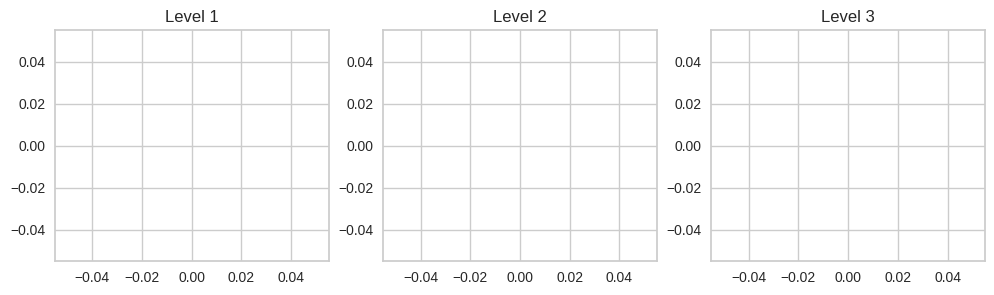

In [21]:
import matplotlib.pyplot as plt

# Compute the latent representations for the input data
z = [model.z[i] for i in range(model.n_levels)]

# Plot the latent representations at different levels
fig, axes = plt.subplots(1, model.n_levels, figsize=(12, 3))
for i in range(model.n_levels):
    # Check if the latent representation is 1D and plot accordingly
    if z[i].ndim == 1:
        axes[i].scatter(range(len(z[i])), z[i])  # Plot against index if 1D
    else:
        axes[i].scatter(z[i][:, 0], z[i][:, 1])  # Plot as scatter if 2D

    axes[i].set_title(f'Level {i+1}')
plt.show()

In [23]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many